# Travel Reviews Analysis 

We analyze the Travel Review Ratings Data Set, which includes almost 5500 reviews from users on 24 different activities. We perform standard statistical and exploratory operations to have a better understanding of the characteristics of the data set. In order to perform a classification of the data set we propose four intuitive categories to split the 24 activities and use a Decision Tree model and a K-Nearest Neighbors model on three different test size samples. Results obtained were satisfactory with accuracies around 90%; two improvements are discussed for future implementations.

## Libraries

We begin by importing all the libraries we will use: data libraries (numpy and pandas), plotting libraries (matplotlib and seaborn) and learning libraries (sklearn).

In [0]:
# Data
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
% matplotlib inline

# Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Retrieving

We read the csv file directly from the website and load it into a pandas dataframe. Then we print the first few lines.

In [62]:
df_path = 'google_review_ratings.csv'
#df_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv'
df = pd.read_csv(df_path, index_col='User')
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


Since the data description only specifies 24 columns and the data includes an extra 25th column, we drop it. Then we rename the remaining columns according to the description.

In [63]:
df.drop('Unnamed: 25', axis=1, inplace=True)
columns = ['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums', 'Malls', 'Zoo',
            'Restaurants', 'Pubs Bars', 'Local Services','Burger Pizza Shops', 'Hotels Other Lodgings',
            'Juice Bars', 'Art Galleries', 'Dance Clubs', 'Swimming Pools', 'Gyms', 'Bakeries', 'Beauty Spas',
            'Cafes', 'View Points', 'Monuments', 'Gardens']
df.columns = columns
df.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs Bars,Local Services,Burger Pizza Shops,Hotels Other Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty Spas,Cafes,View Points,Monuments,Gardens
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Next we check the data types for the columns.

In [64]:
df.dtypes

Churches                 float64
Resorts                  float64
Beaches                  float64
Parks                    float64
Theatres                 float64
Museums                  float64
Malls                    float64
Zoo                      float64
Restaurants              float64
Pubs Bars                float64
Local Services            object
Burger Pizza Shops       float64
Hotels Other Lodgings    float64
Juice Bars               float64
Art Galleries            float64
Dance Clubs              float64
Swimming Pools           float64
Gyms                     float64
Bakeries                 float64
Beauty Spas              float64
Cafes                    float64
View Points              float64
Monuments                float64
Gardens                  float64
dtype: object

One of the columns has non-numerical values. We convert that column to numerical values and check for missing values in the dataset.

In [65]:
df['Local Services'] = pd.to_numeric(df['Local Services'], errors='coerce')
df.isna().sum()

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs Bars                0
Local Services           1
Burger Pizza Shops       1
Hotels Other Lodgings    0
Juice Bars               0
Art Galleries            0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty Spas              0
Cafes                    0
View Points              0
Monuments                0
Gardens                  1
dtype: int64

There are only 3 missing values in total: 1 in the Local Services column, 1 in the Burger Pizza Shops column and 1 in the Gardens column. We fill those missing values with zeros.

In [0]:
df = df.fillna(0.0)

# Data Exploration

We move now to analysing the data. The describe method gives the mean rating for each activity and other useful stats.

In [67]:
df.describe()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs Bars,Local Services,Burger Pizza Shops,Hotels Other Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty Spas,Cafes,View Points,Monuments,Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.549604,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.382074,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.000000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can notice a great variation of mean ratings for each activity. We plot those mean ratings to have a more visual understanding of the distribution.

[Text(0.5, 0, 'Mean rating')]

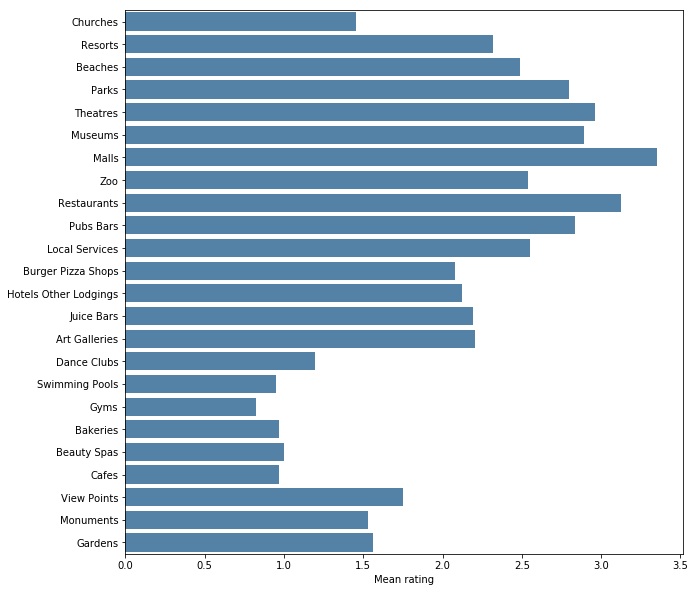

In [68]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=[np.mean(df[col]) for col in df.columns], y=df.columns, color='steelblue')
ax.set(xlabel='Mean rating')

We can notice two clusters of activities: in of them, all activities have a mean rating around 3.0, on the other one they have a mean rating around 1.0. In order to understand why this happens, we plot histograms for these activities.

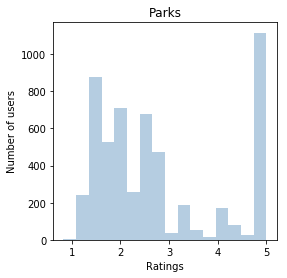

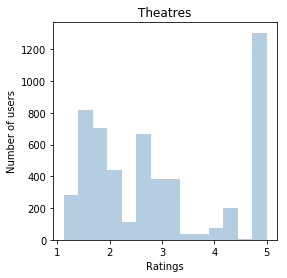

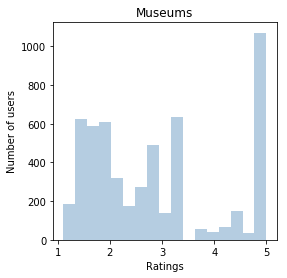

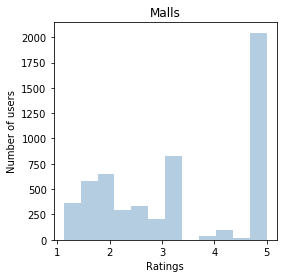

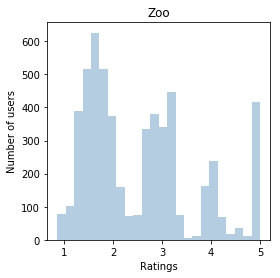

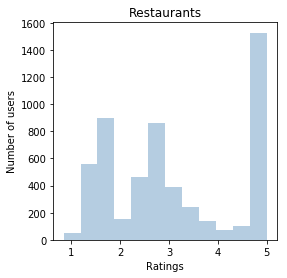

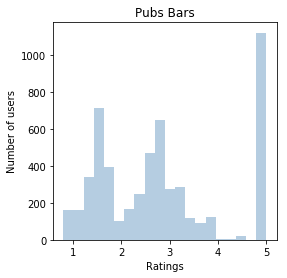

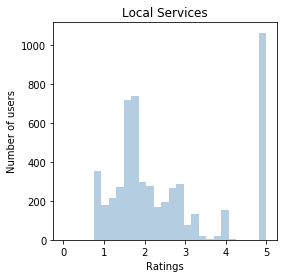

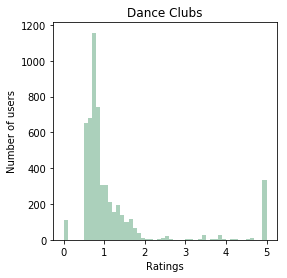

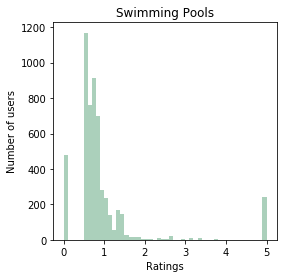

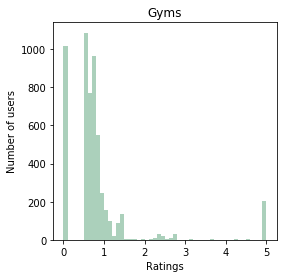

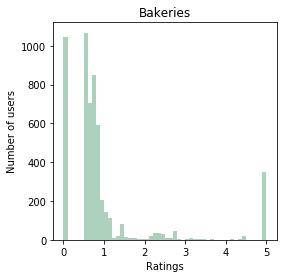

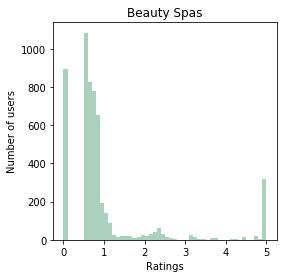

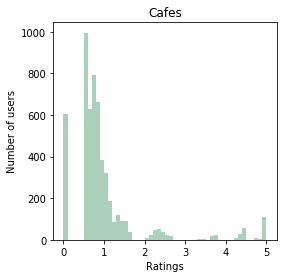

In [69]:
for col in [col for col in df.columns if df[col].mean()>2.5]:
    f, ax = plt.subplots(figsize=(4,4))
    sns.distplot(df[col], kde=False, label=col, color='steelblue')
    ax.set(xlabel='Ratings', ylabel='Number of users', title=col)
    
for col in [col for col in df.columns if df[col].mean()<1.3]:
    f, ax = plt.subplots(figsize=(4,4))
    sns.distplot(df[col], kde=False, label=col, color='seagreen')
    ax.set(xlabel='Ratings', ylabel='Number of users', title=col)

The difference appears to come from the fact that for the first group there are no 0 rating reviews, whereas for the second group there are a considerable amount of 0 rating reviews. We recall these values were already present in the dataset. We can visualize this by plotting the number of non-zero reviews for each activity, and recognizing the activities with low mean ratings as those with fewer number of reviews.

[Text(0.5, 0, 'Total number of reviews')]

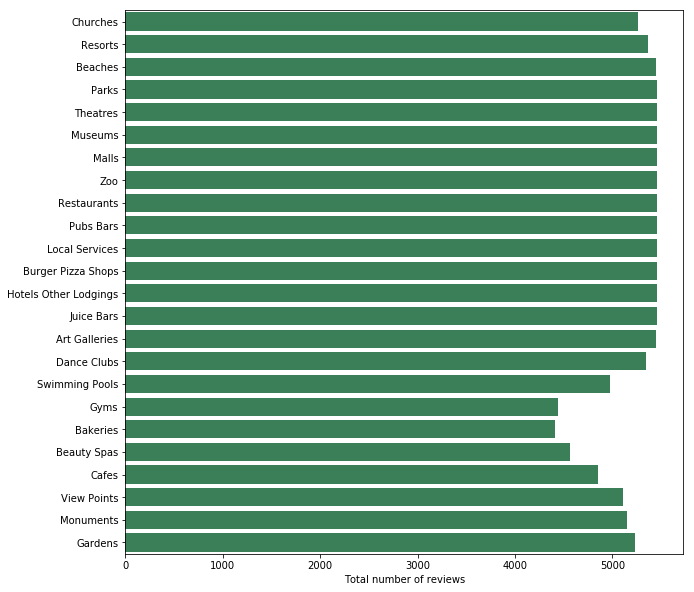

In [70]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df.astype(bool).sum(axis=0), y=df.columns, color='seagreen')
ax.set(xlabel='Total number of reviews')

In [0]:
df = df.replace(0, np.NaN)
df = df.fillna(df.mean(skipna=True))

In [76]:
df.describe()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs Bars,Local Services,Burger Pizza Shops,Hotels Other Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty Spas,Cafes,View Points,Monuments,Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.509677,2.358613,2.491157,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071,2.078339,2.125511,2.190861,2.208191,1.217799,1.040557,1.010834,1.199839,1.196577,1.086070,1.868701,1.621189,1.627901
std,0.778697,1.389322,1.245992,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643,1.249094,1.406542,1.576686,1.714919,1.093451,0.927924,0.862292,1.107440,1.108522,0.865148,1.532665,1.263624,1.126039
min,0.500000,0.500000,0.500000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.260000,0.500000
25%,0.980000,1.380000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.710000,0.630000,0.640000,0.650000,0.640000,0.660000,0.790000,0.860000,0.940000
50%,1.360000,2.010000,2.070000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.810000,0.780000,0.790000,0.810000,0.800000,0.840000,1.110000,1.140000,1.340000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.217799,1.040557,1.010834,1.199839,1.196577,1.086070,2.070000,1.621189,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


[Text(0.5, 0, 'Mean rating')]

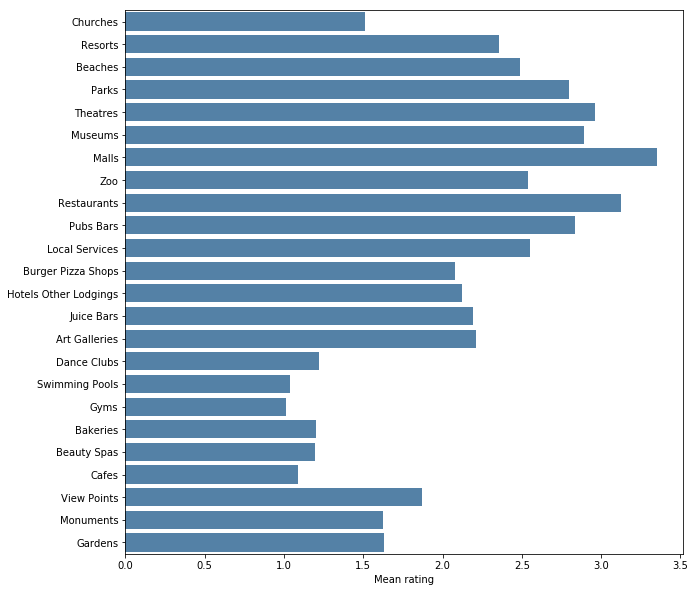

In [77]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=[np.mean(df[col]) for col in df.columns], y=df.columns, color='steelblue')
ax.set(xlabel='Mean rating')

# Data Modelling

Next we want to classify the data. We begin by plotting a heatmap of correlations between activities. The histogram appears to show clusters of high correlation between certain activities (e.g. Cafes, View Points, Monuments & Gardens).

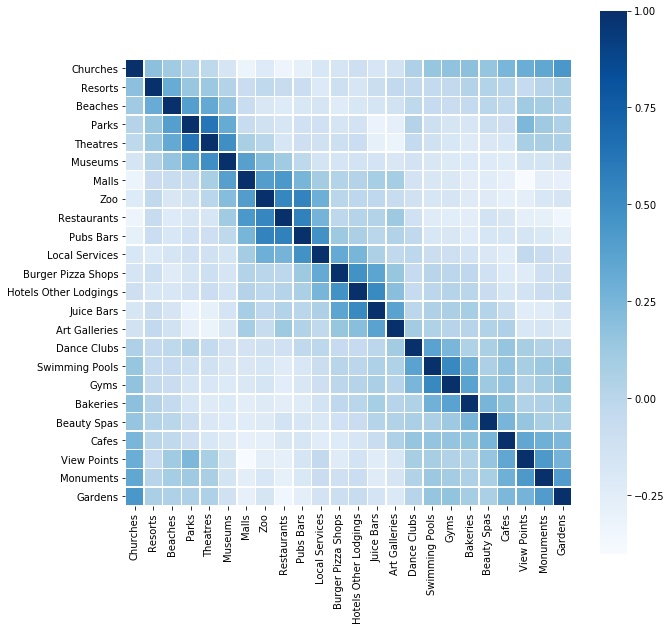

In [78]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True, linewidths=.5, cmap='Blues')

## Categories

The data doesn't specify classes for this data set. 

Since the correlations present in the previous heatmap have no intuitive explanation, we propose a simple grouping in 4 categories with 6 activities each, based on the type of activities that different visitors would be interested in:
* Tourism: Art Galleries, Churches, Museums, Monuments, Zoo & View Points
* Gastronomy: Restaurants, Burger Pizza Shops, Cafes, Pubs Bars, Juice Bars & Bakeries
* Relax: Resorts, Parks, Gardens, Beaches, Swimming Pools & Beauty Spas
* Services: Malls, Local Services, Hotels, Gyms, Dance Clubs & Theatre

In [0]:
categories = {'Art Galleries':'Tourism', 'Churches':'Tourism', 'Museums':'Tourism', 'Monuments':'Tourism', 'Zoo':'Tourism', 'View Points':'Tourism',
              'Restaurants':'Gastronomy', 'Burger Pizza Shops':'Gastronomy', 'Bakeries':'Gastronomy', 'Cafes':'Gastronomy', 'Juice Bars':'Gastronomy', 'Pubs Bars':'Gastronomy',
              'Resorts':'Relax', 'Parks':'Relax', 'Gardens':'Relax', 'Beaches':'Relax', 'Beauty Spas':'Relax', 'Swimming Pools':'Relax',
              'Malls':'Services', 'Local Services':'Services', 'Hotels Other Lodgings':'Services', 'Theatres':'Services', 'Dance Clubs':'Services', 'Gyms':'Services'
             }

y = pd.DataFrame(index=df.index, columns=['Category'])

In order to see whether these categories are correct, we plot correlation graphs for all pairs of activities in each category.

**NB: The following cell takes a long time to run**

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


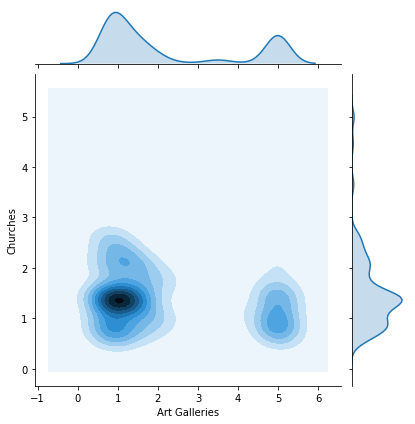

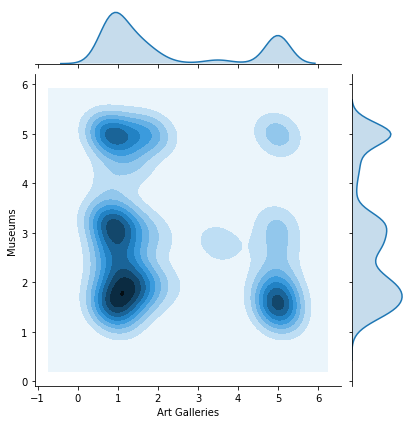

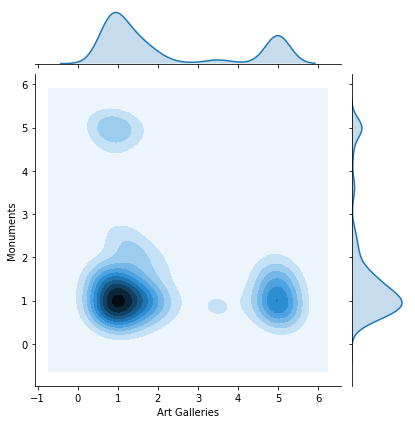

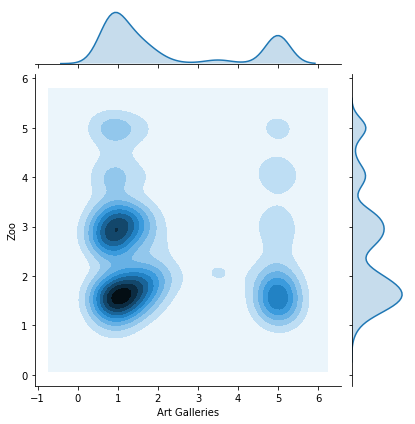

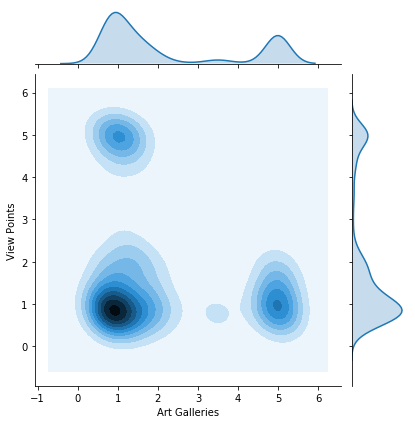

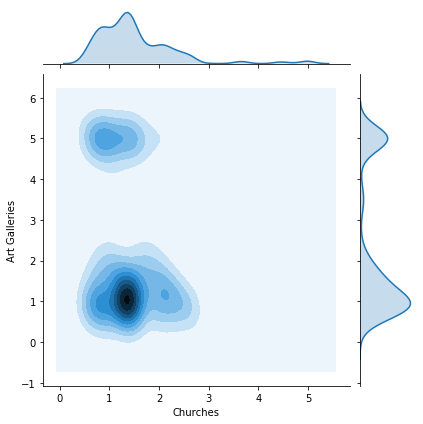

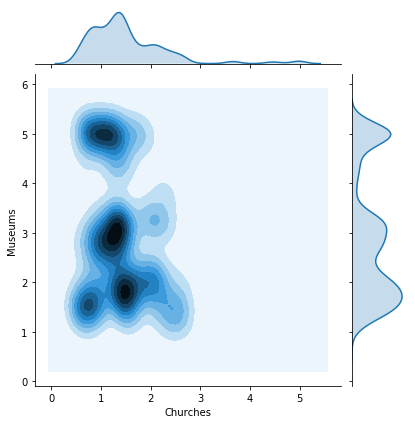

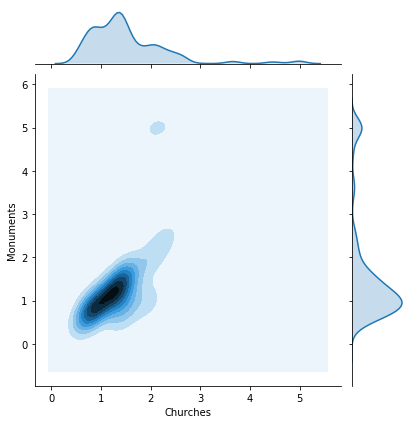

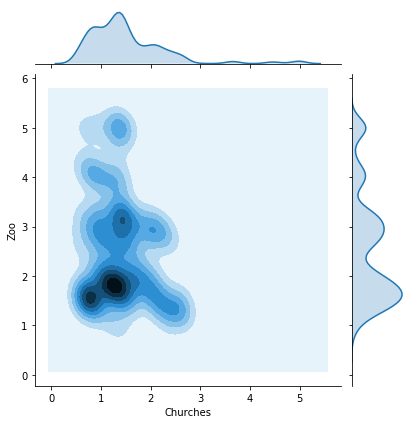

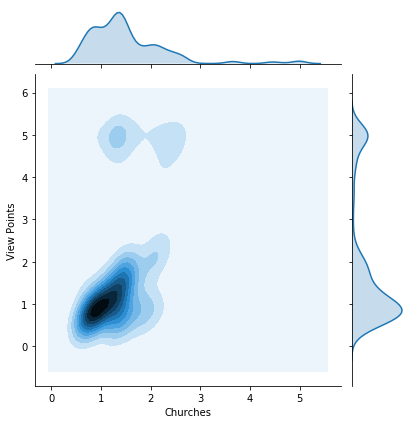

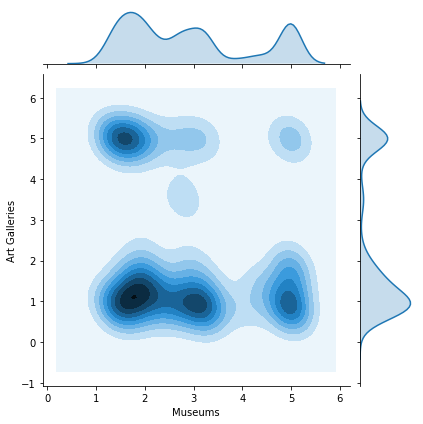

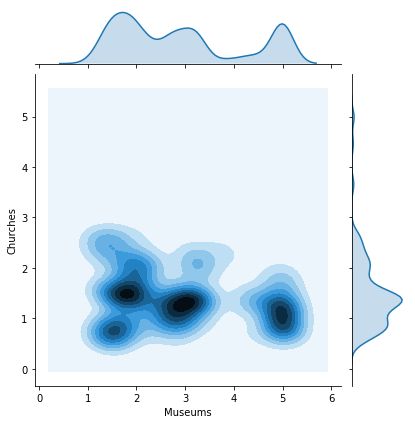

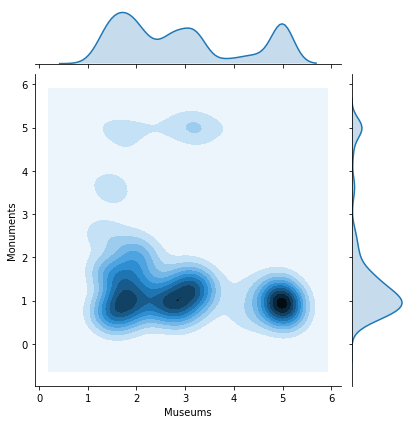

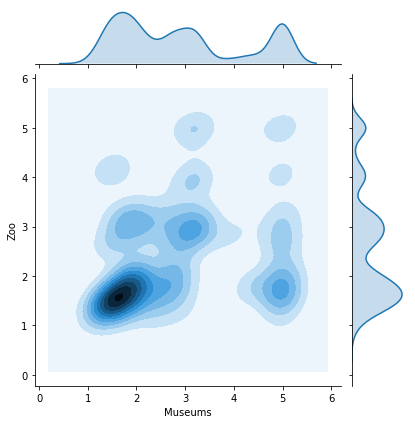

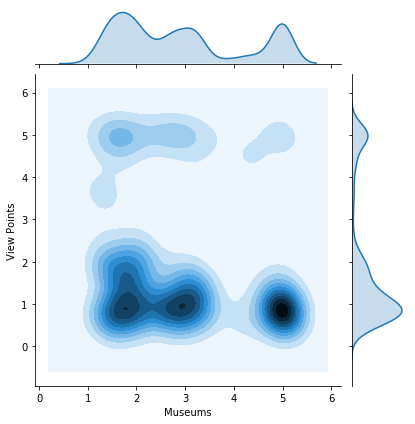

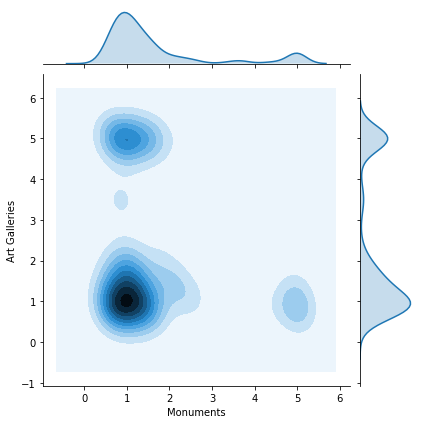

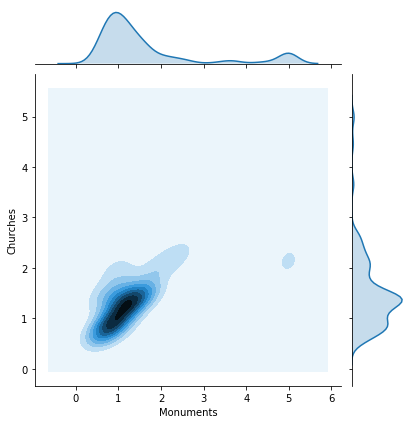

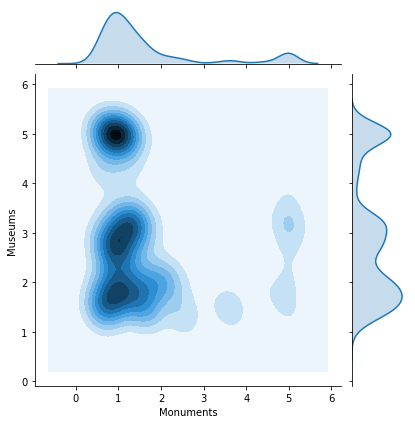

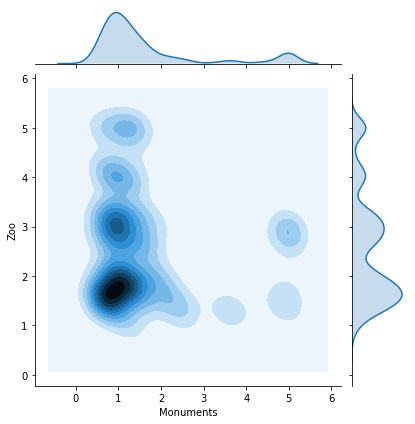

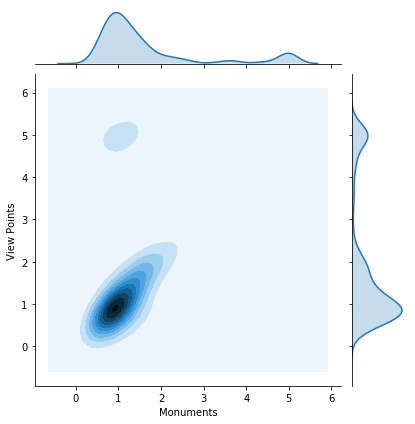

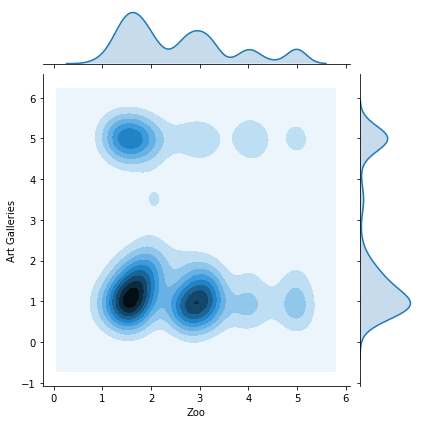

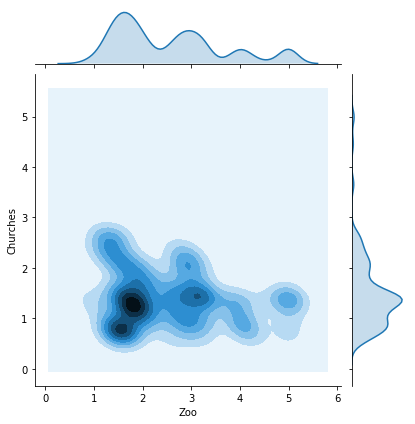

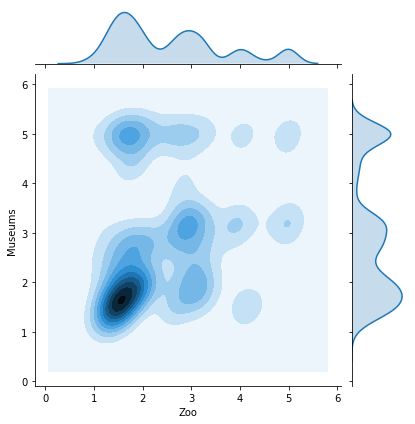

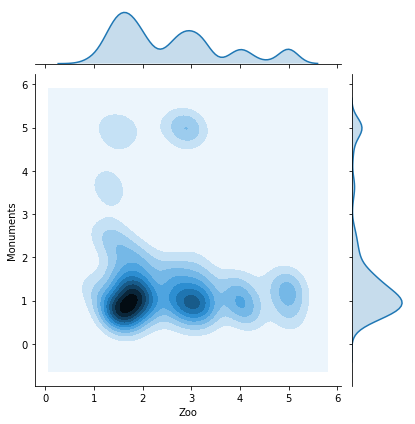

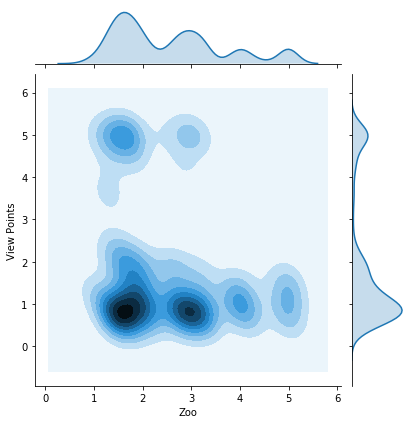

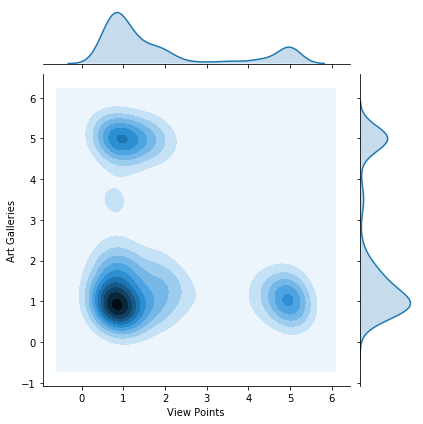

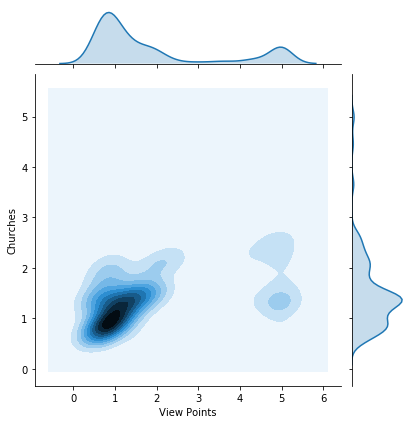

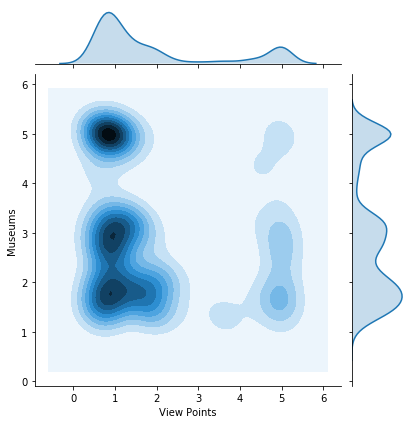

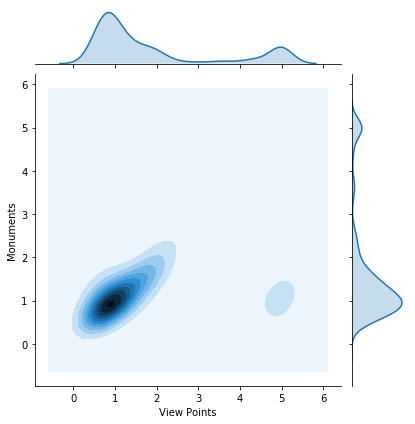

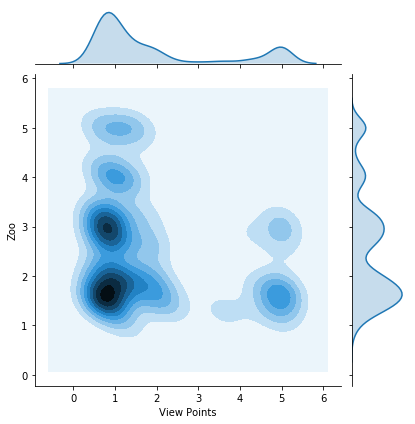

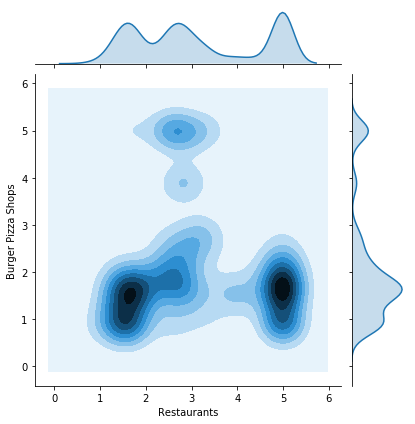

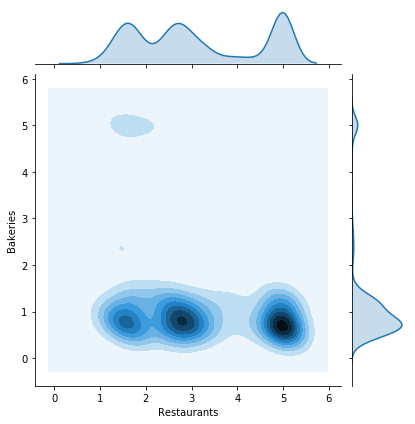

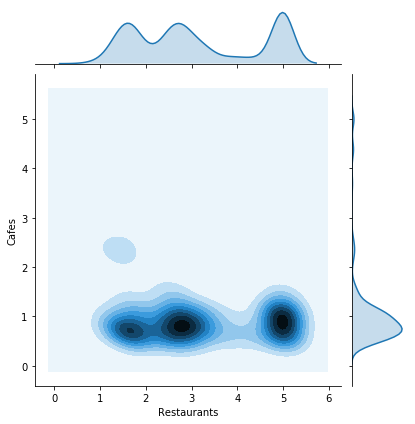

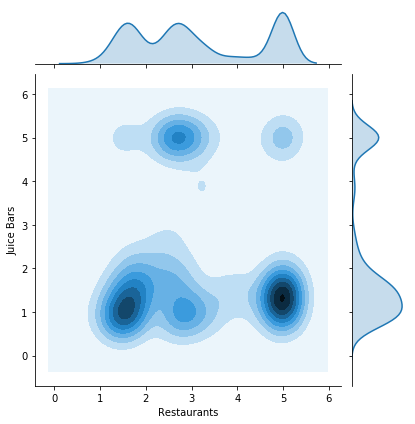

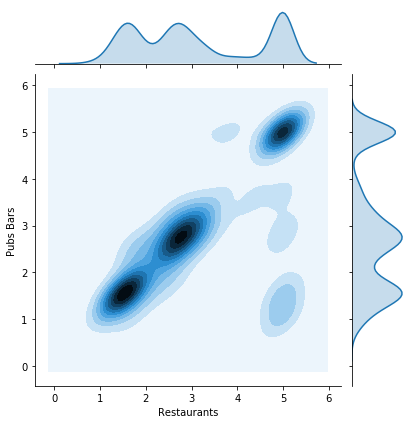

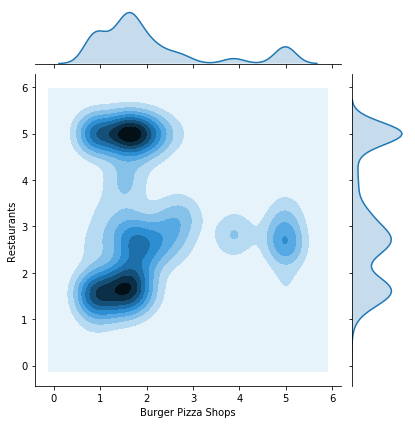

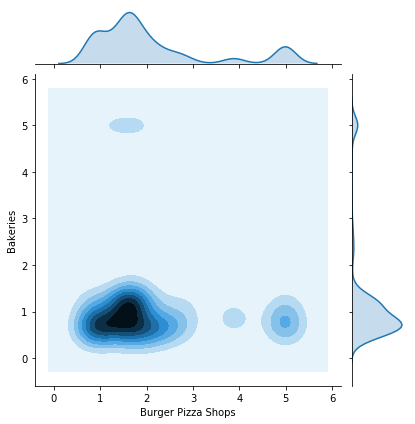

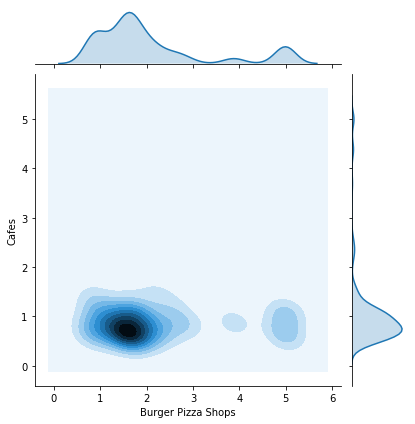

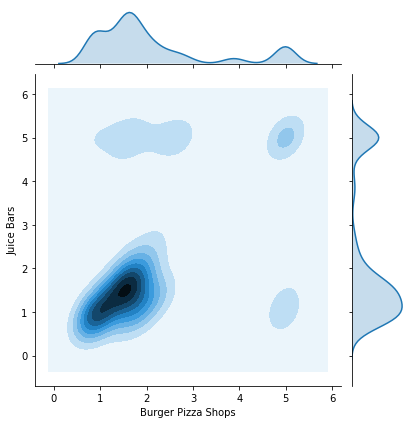

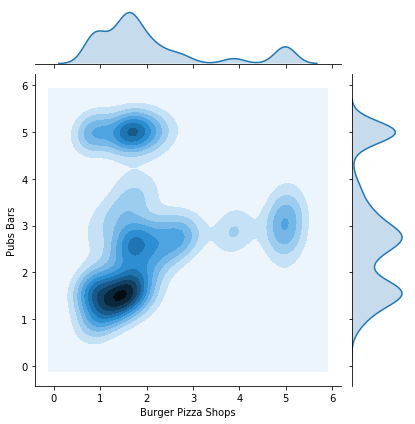

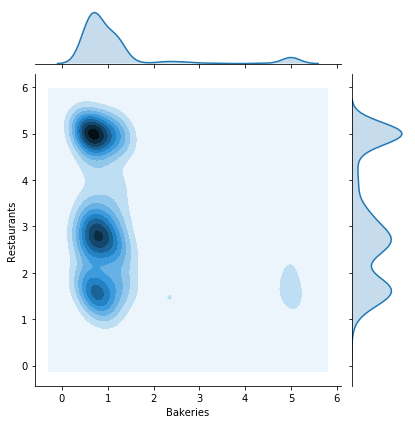

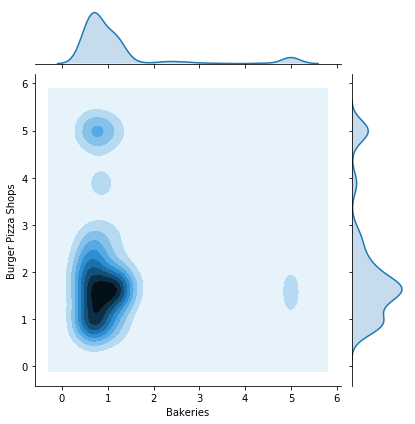

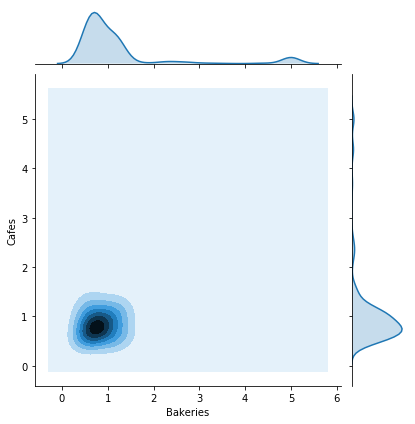

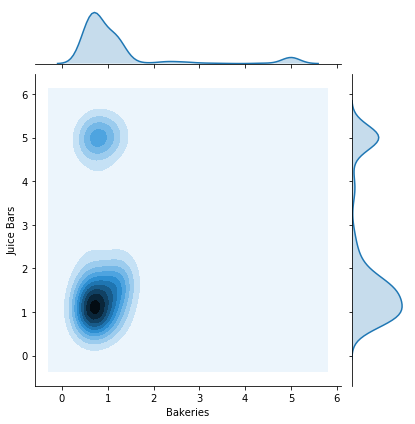

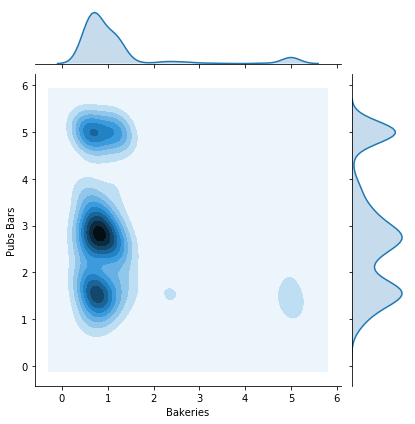

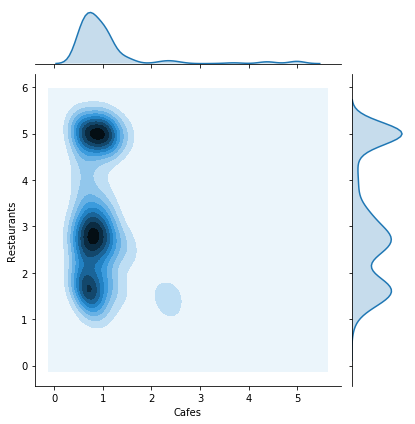

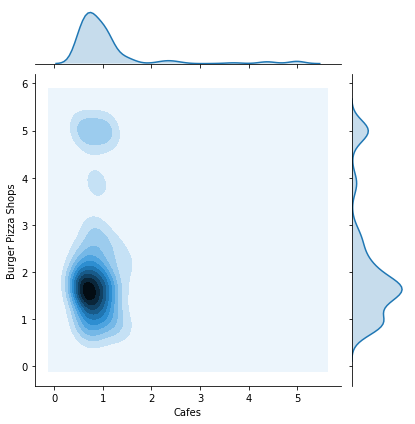

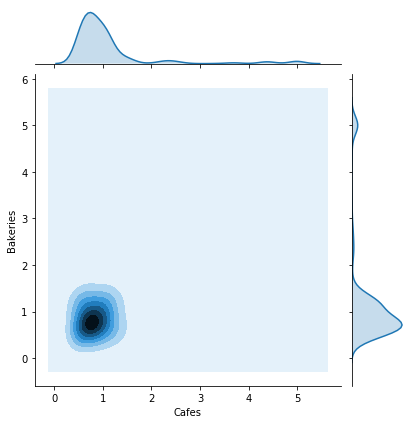

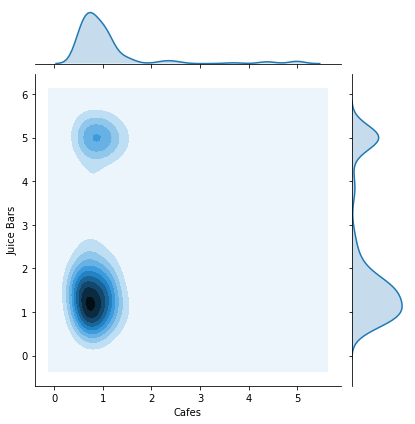

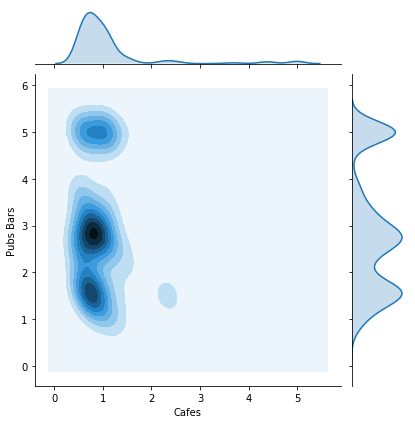

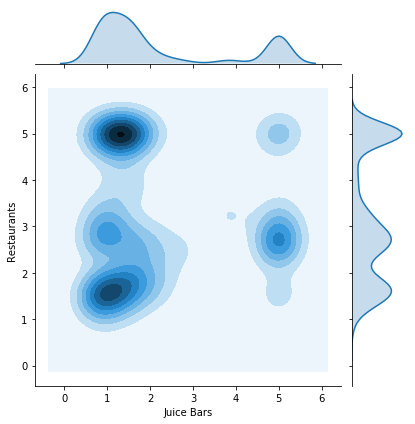

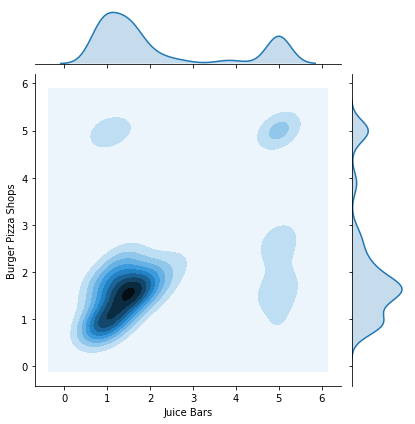

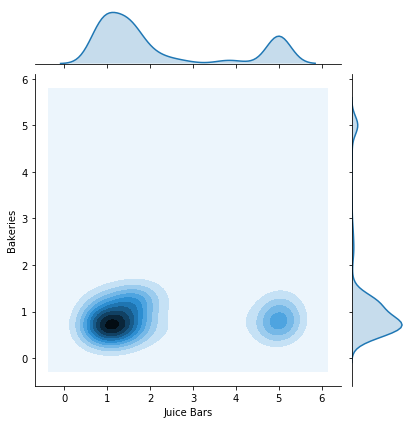

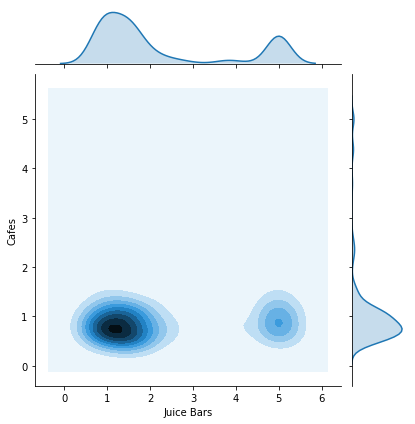

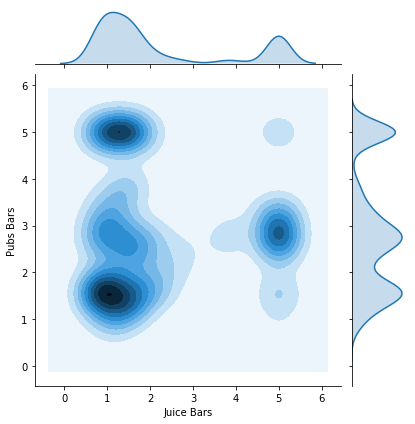

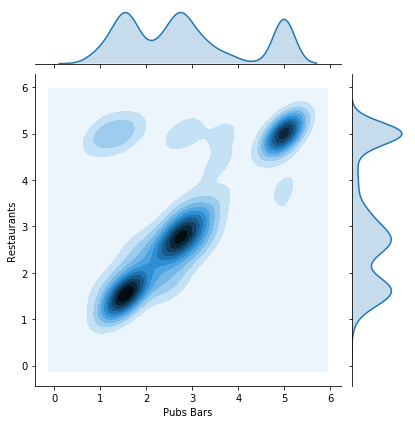

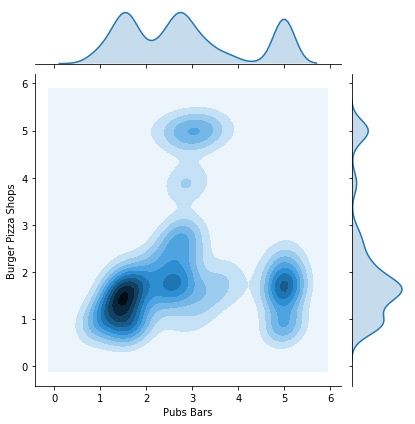

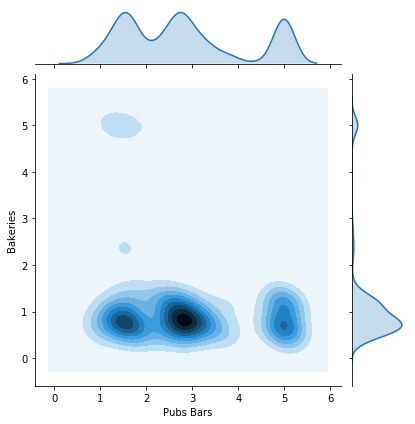

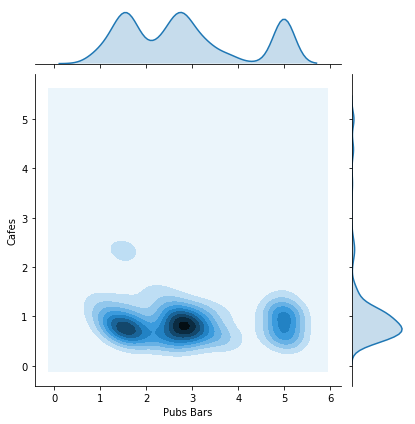

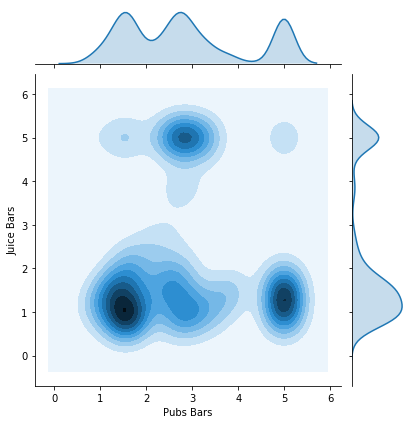

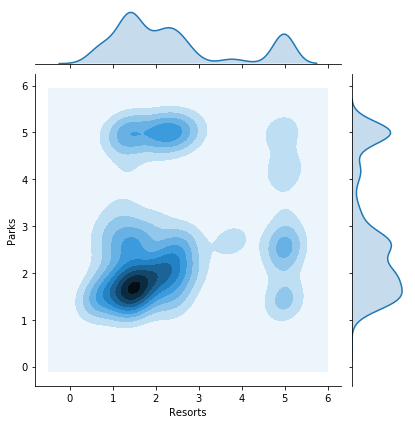

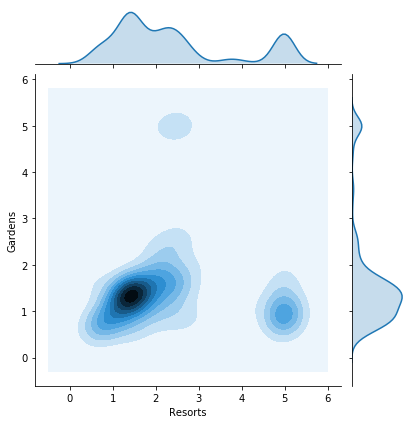

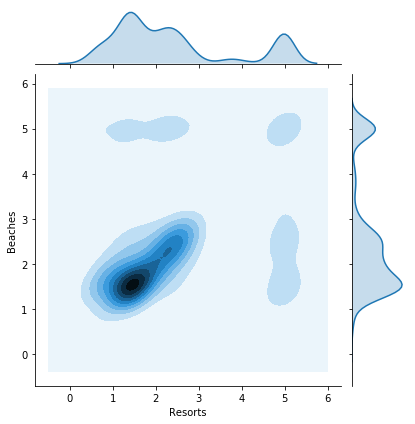

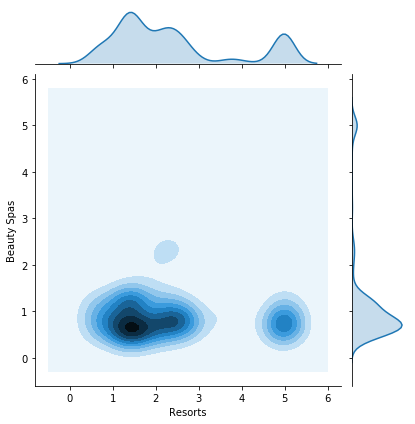

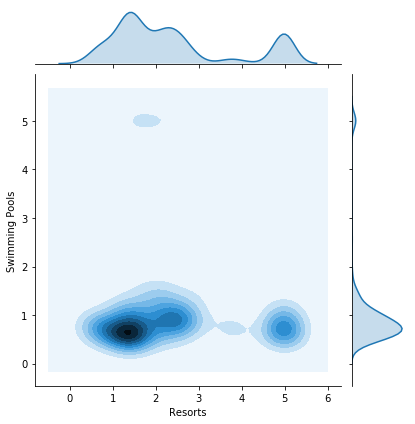

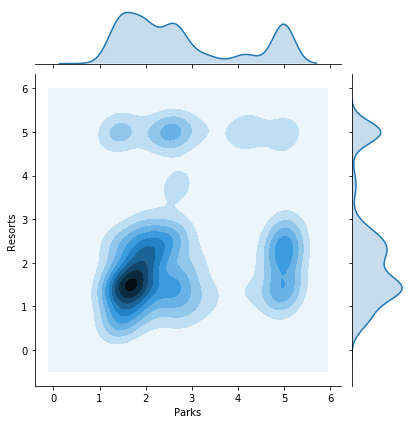

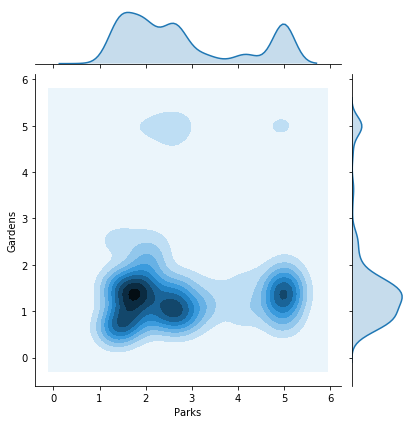

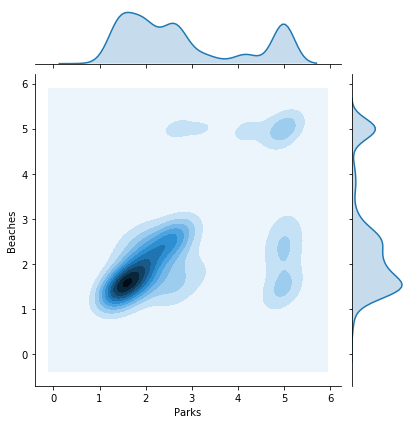

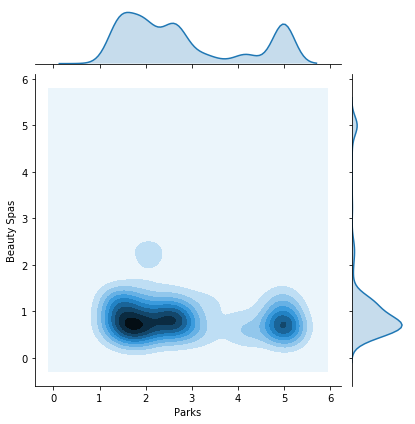

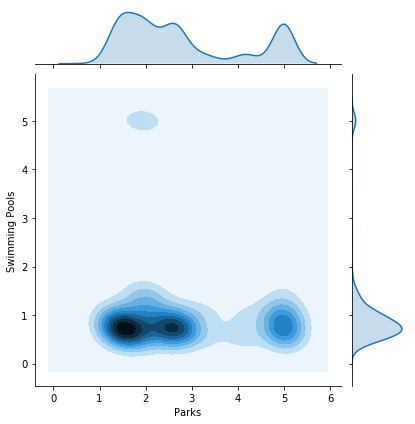

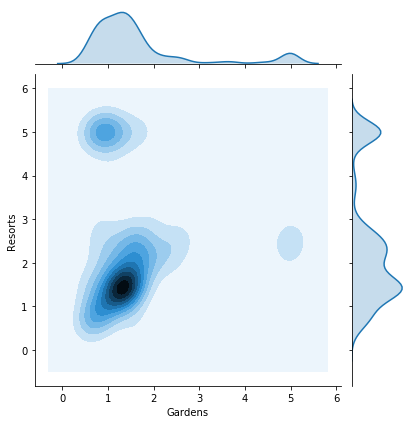

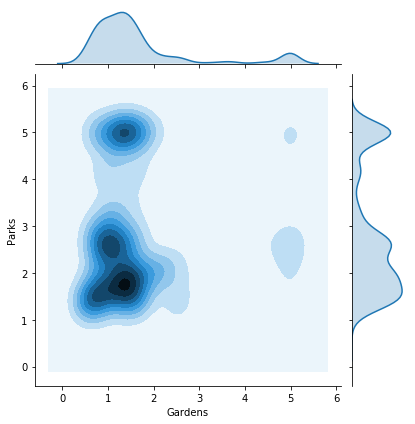

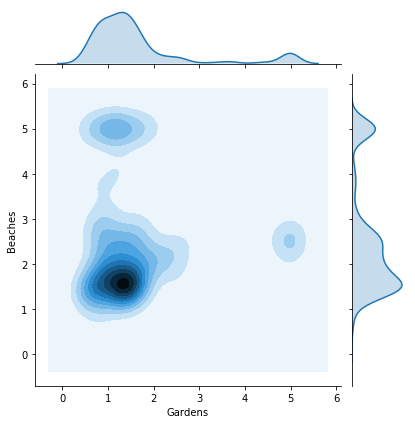

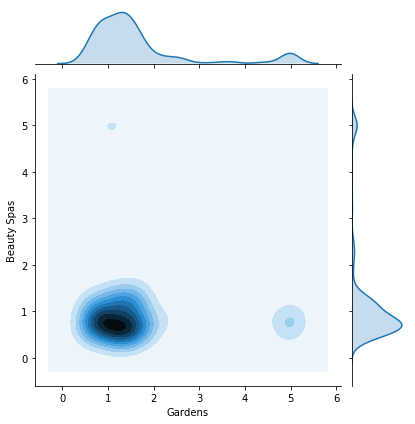

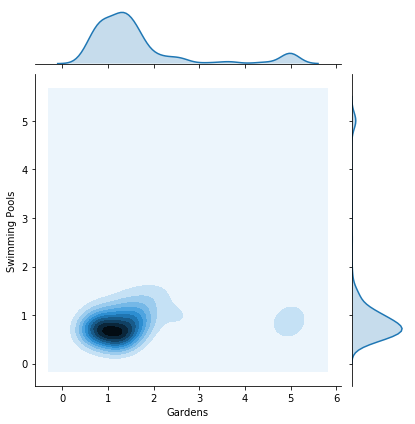

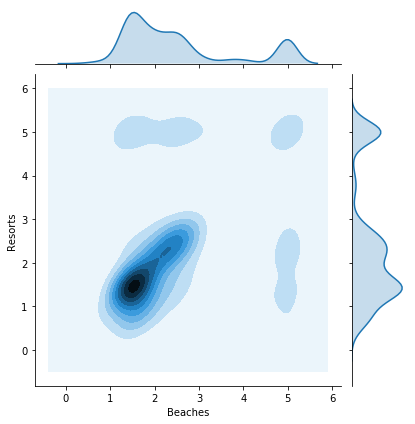

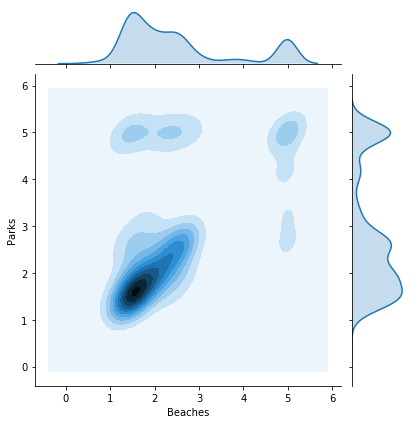

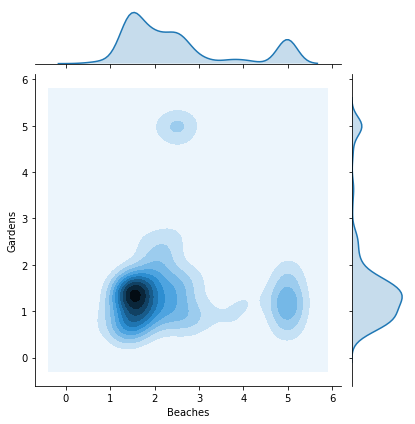

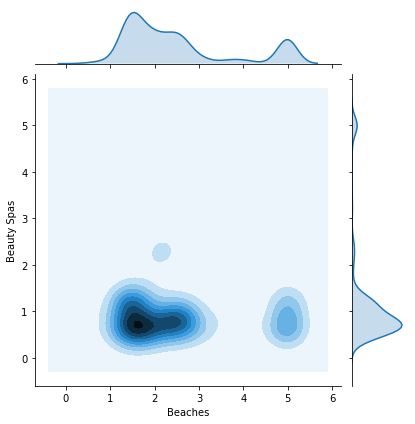

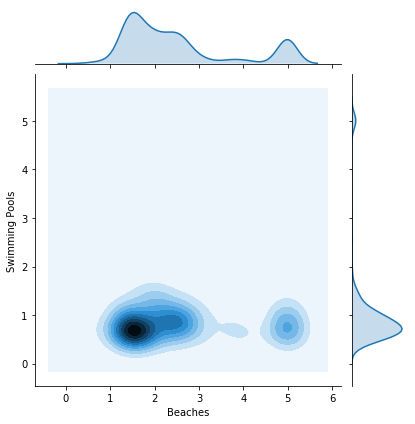

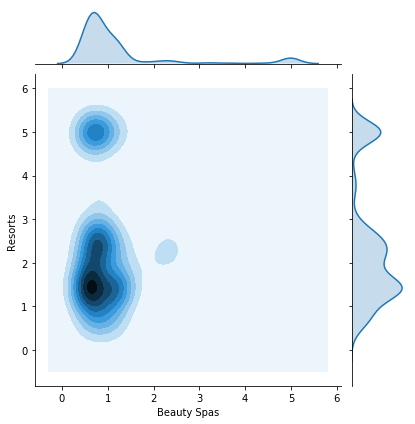

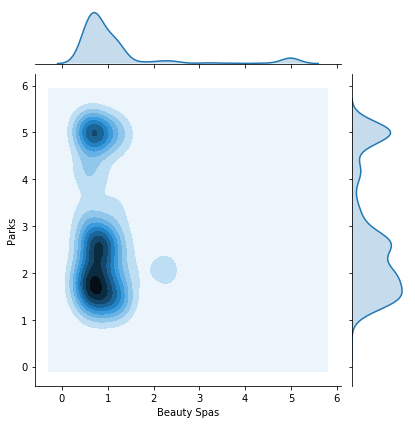

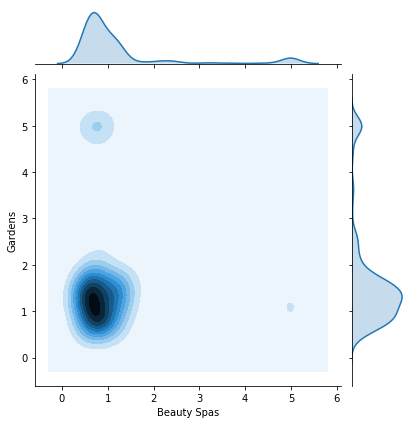

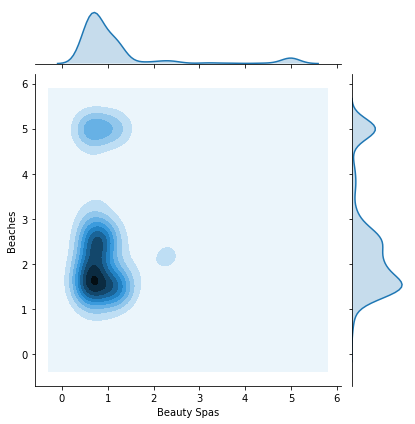

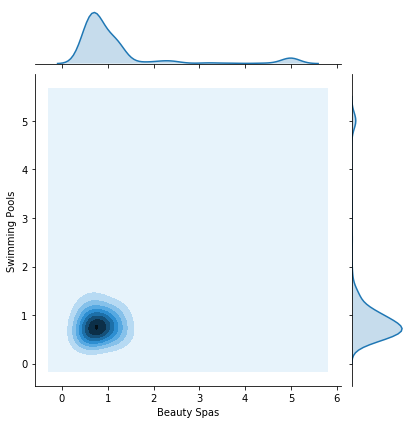

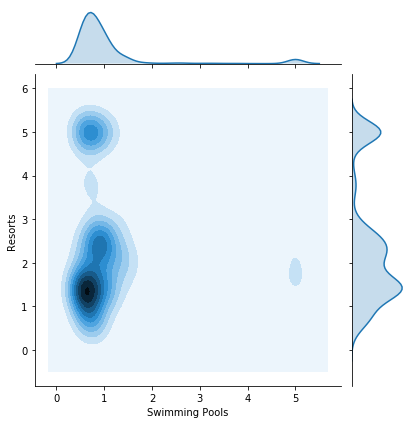

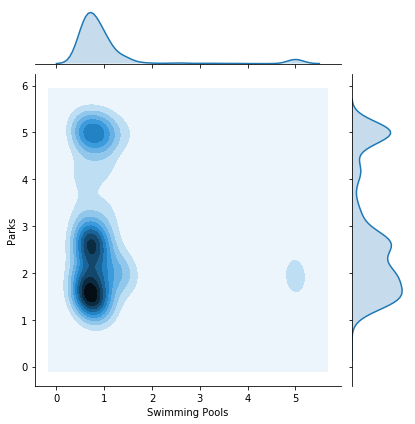

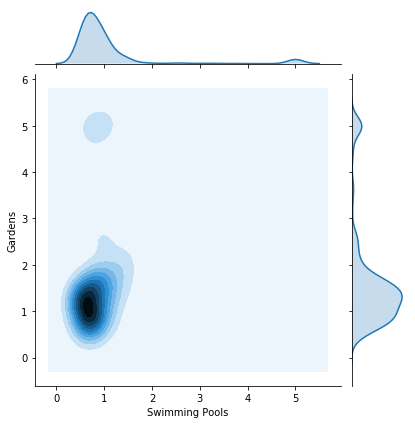

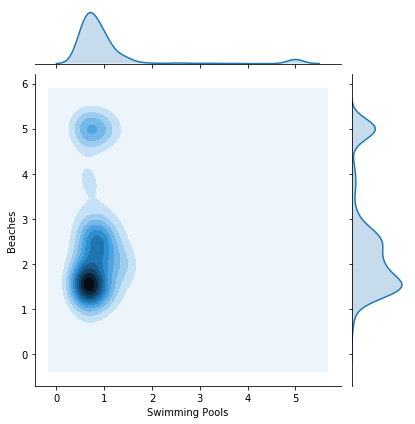

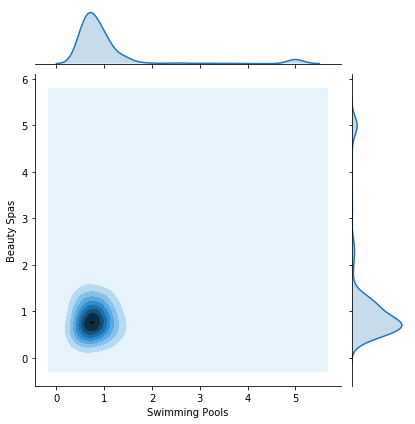

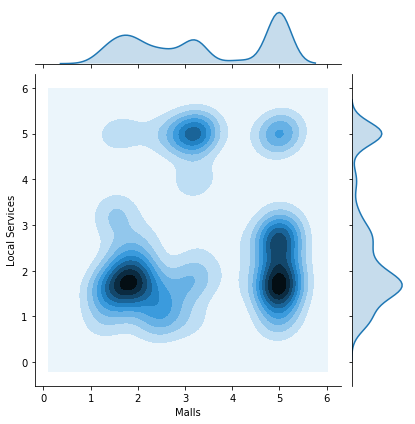

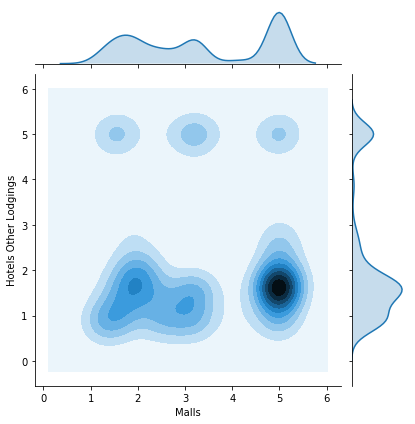

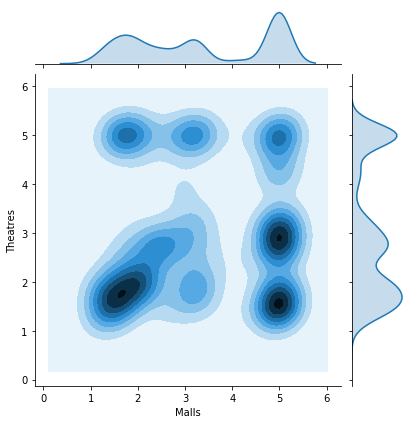

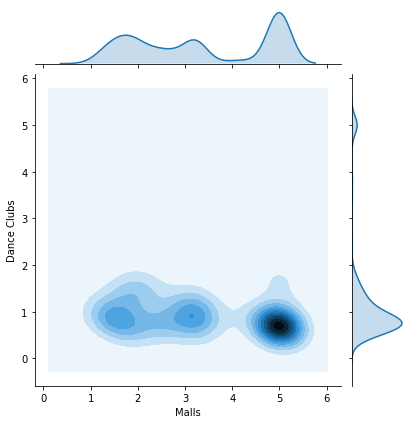

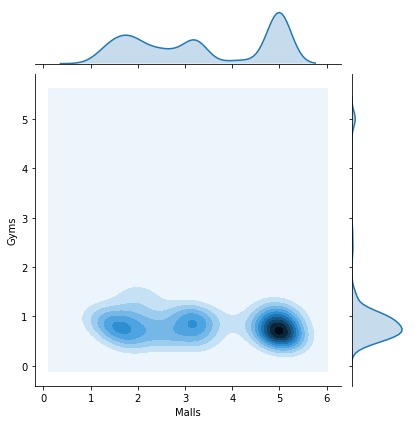

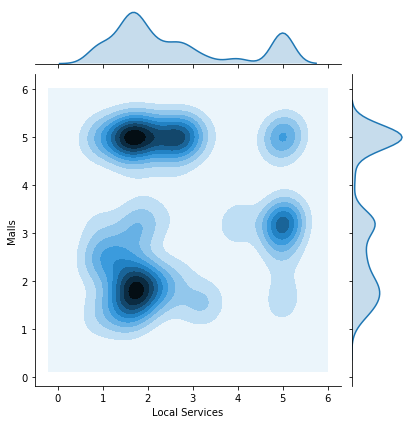

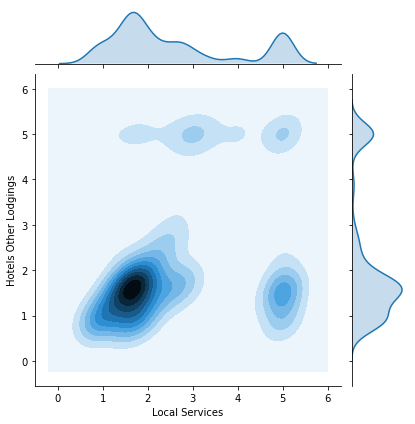

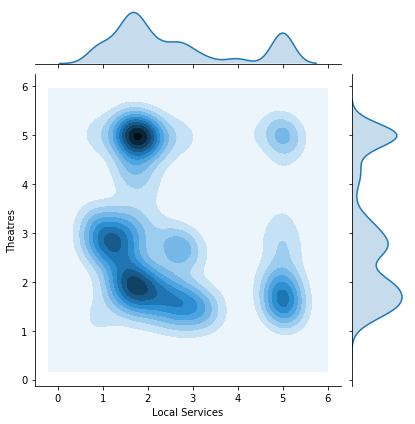

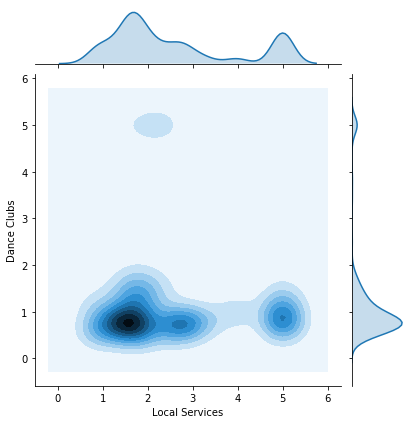

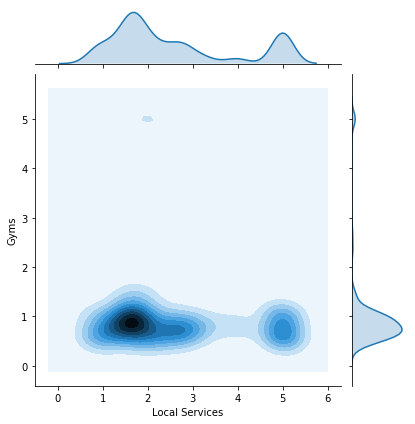

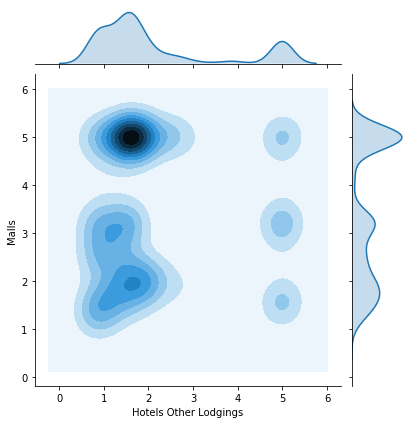

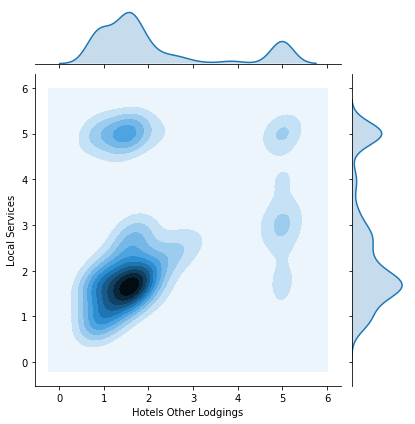

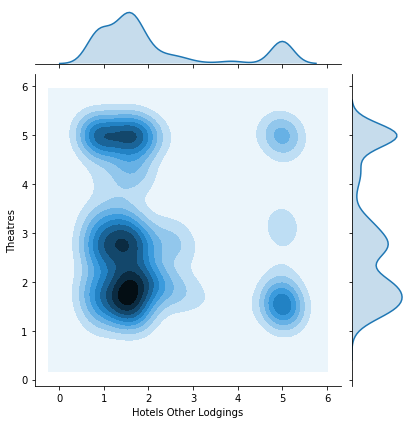

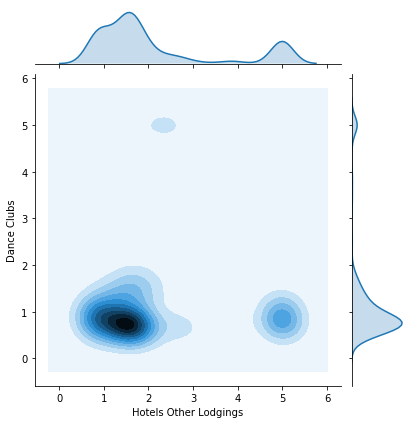

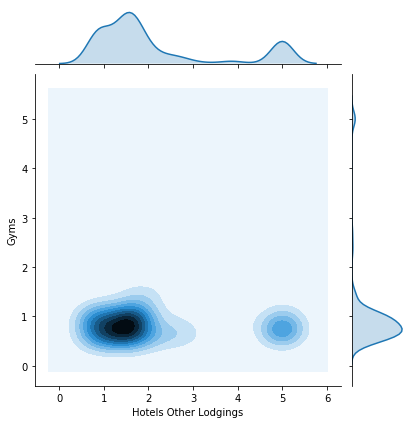

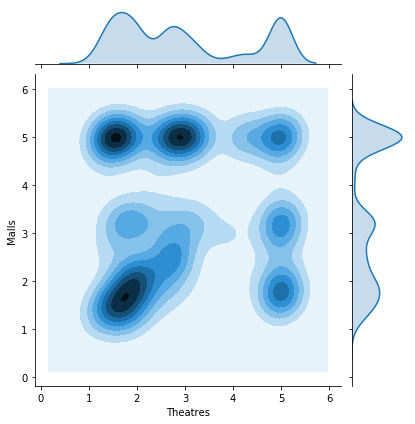

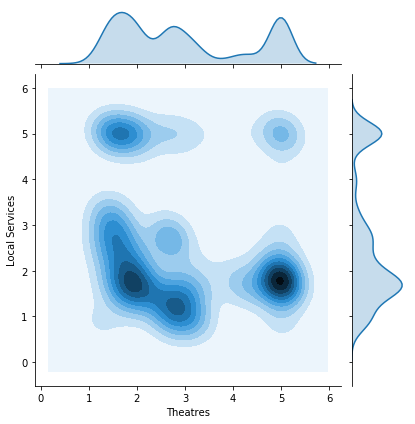

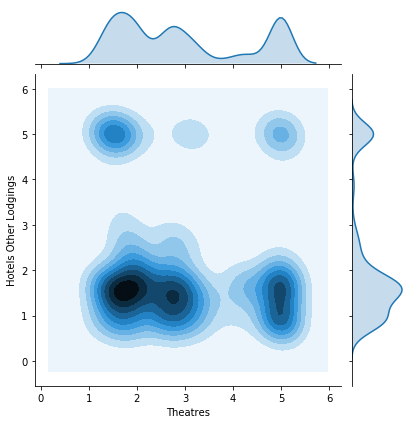

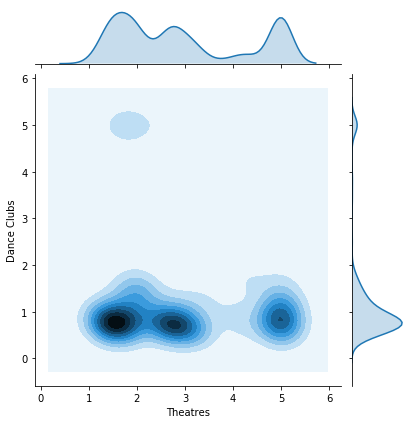

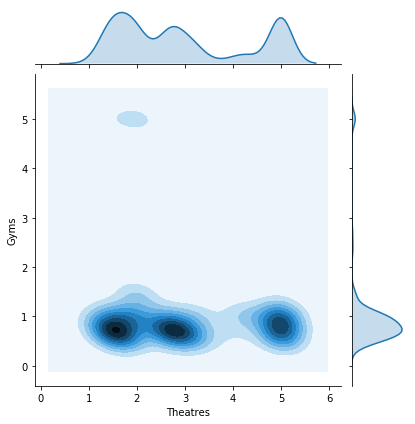

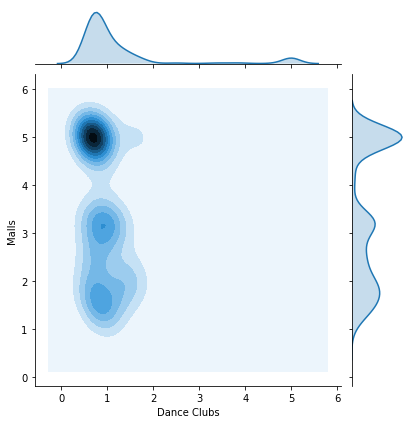

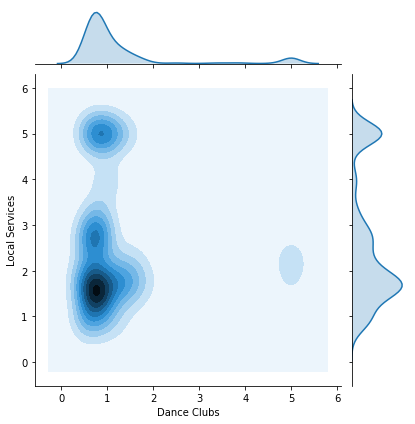

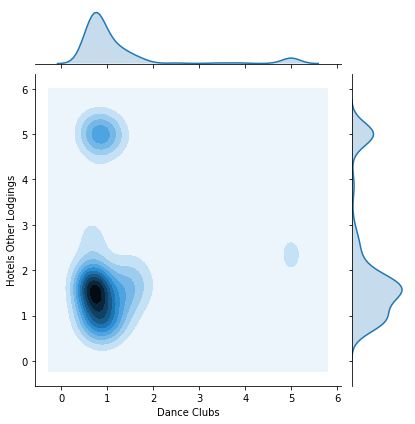

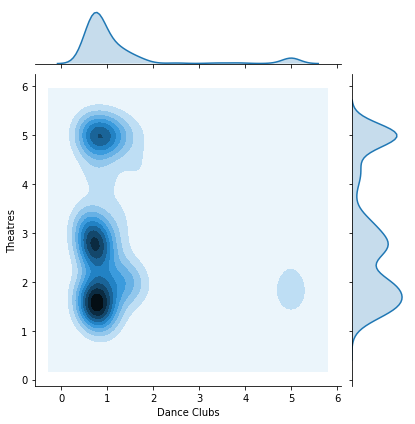

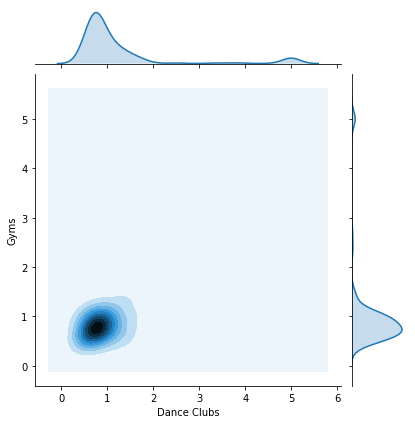

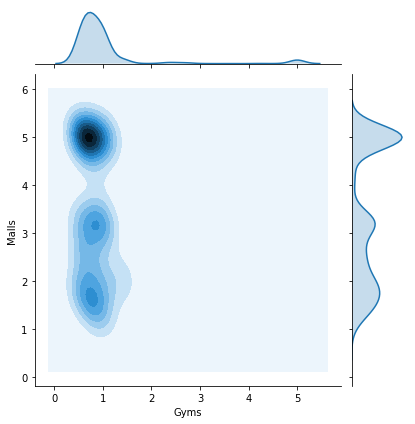

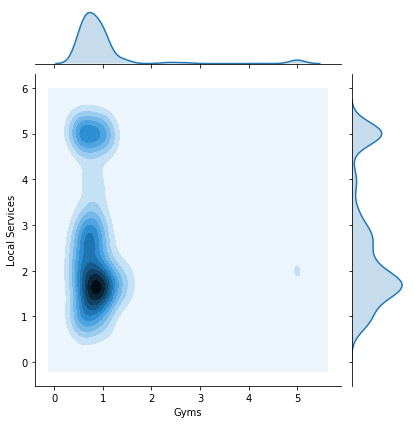

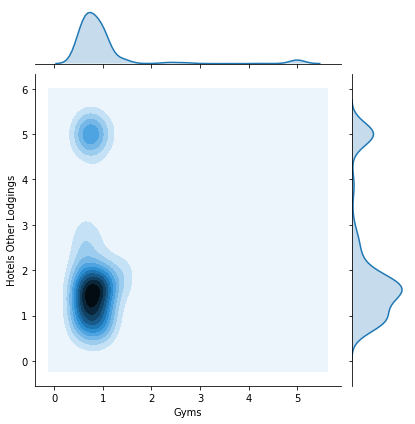

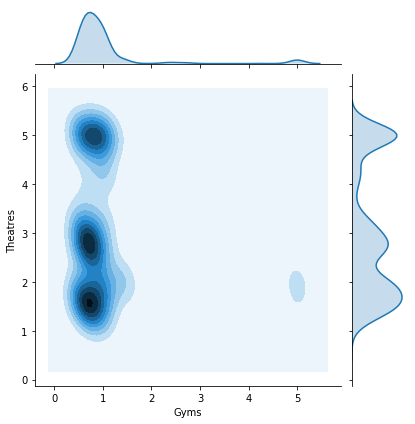

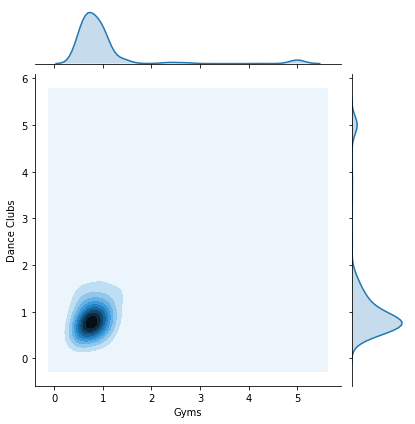

In [128]:
for activity1 in categories:
    for activity2 in categories:
        if activity2 != activity1 and categories[activity2] == categories[activity1]:
            sns.jointplot(x=activity1,y=activity2,data=df, kind='kde')

We create a new pandas dataframe y with the chosen category for each user (based on the ratings for the activities in each category).

In [0]:
for user_index in range(df.index.shape[0]):
    categories_mean = {'Tourism':0, 'Gastronomy':0, 'Relax':0, 'Services':0}
    activity_index = 0
    for activity in df.columns:
        categories_mean[categories[activity]] += (df.iloc[user_index][activity] / 6) #These categories include 2 activities
        activity_index += 1
    y.iloc[user_index]['Category']= max(categories_mean, key=categories_mean.get)

A histogram shows Services is the most popular category. On the other hand, Relax is the least popular category.

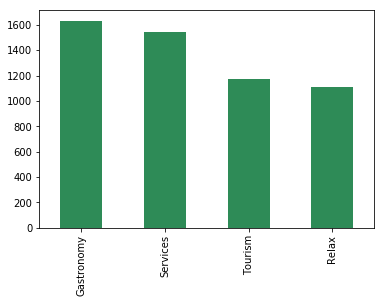

In [81]:
y['Category'].value_counts().plot(kind='bar', color='seagreen')

## Decision Tree

The first model we test on the data is a Decision Tree.

First we have a look at an example with a test size of 25%. We get the predictions and plot the decision tree as a graph.



In [82]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=test_size)
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test)
print(classification_report(y_test, predictions_tree))

## Uncomment for graphviz visualization of graph
## NB: Requires graphviz (pip install graphviz)
#from graphviz import Source
#Source(export_graphviz(model_tree, out_file=None, feature_names=df.columns, class_names=list(categories_mean.keys()), filled=True))

## Uncomment for png visualization of graph
## NB: Requires pydotplus (pip install pydotplus)
#import pydotplus
#dot_data = export_graphviz(model_tree, out_file=None, feature_names=df.columns, class_names=list(categories_mean.keys()), filled=True)
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

              precision    recall  f1-score   support

  Gastronomy       0.86      0.87      0.87       410
       Relax       0.77      0.78      0.78       273
    Services       0.87      0.83      0.85       399
     Tourism       0.78      0.80      0.79       282

    accuracy                           0.83      1364
   macro avg       0.82      0.82      0.82      1364
weighted avg       0.83      0.83      0.83      1364



In [116]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=test_size)
model_tree = DecisionTreeClassifier(min_samples_leaf=5)
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test)
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

  Gastronomy       0.82      0.86      0.84       411
       Relax       0.82      0.79      0.81       277
    Services       0.81      0.81      0.81       393
     Tourism       0.79      0.77      0.78       283

    accuracy                           0.81      1364
   macro avg       0.81      0.81      0.81      1364
weighted avg       0.81      0.81      0.81      1364



In [112]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=test_size)
model_tree = DecisionTreeClassifier(max_depth=7)
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test)
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

  Gastronomy       0.86      0.83      0.84       427
       Relax       0.71      0.75      0.73       275
    Services       0.75      0.82      0.78       368
     Tourism       0.73      0.64      0.68       294

    accuracy                           0.77      1364
   macro avg       0.76      0.76      0.76      1364
weighted avg       0.77      0.77      0.77      1364



Now we test the model on all 3 test sizes: 50%, 40% and 20%. For each test size we find the error rate, the precision score, the recall score, the f1 score and we plot a heatmap of the confusion matrix.


Test size: 0.500000
Error rate: 0.799853
              precision    recall  f1-score   support

  Gastronomy       0.84      0.82      0.83       810
       Relax       0.78      0.82      0.80       573
    Services       0.79      0.81      0.80       777
     Tourism       0.78      0.74      0.76       568

    accuracy                           0.80      2728
   macro avg       0.80      0.80      0.80      2728
weighted avg       0.80      0.80      0.80      2728


Test size: 0.400000
Error rate: 0.791571
              precision    recall  f1-score   support

  Gastronomy       0.86      0.83      0.84       665
       Relax       0.74      0.80      0.77       426
    Services       0.78      0.79      0.78       624
     Tourism       0.76      0.75      0.75       468

    accuracy                           0.79      2183
   macro avg       0.79      0.79      0.79      2183
weighted avg       0.79      0.79      0.79      2183


Test size: 0.200000
Error rate: 0.819597
    

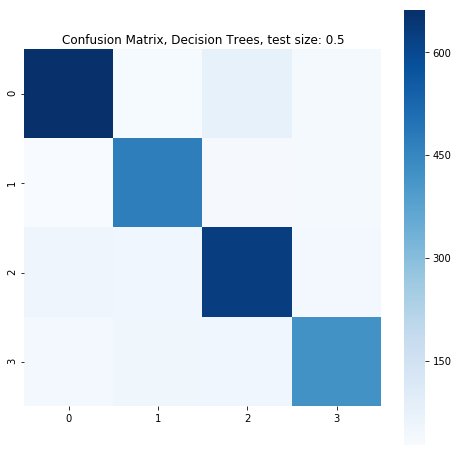

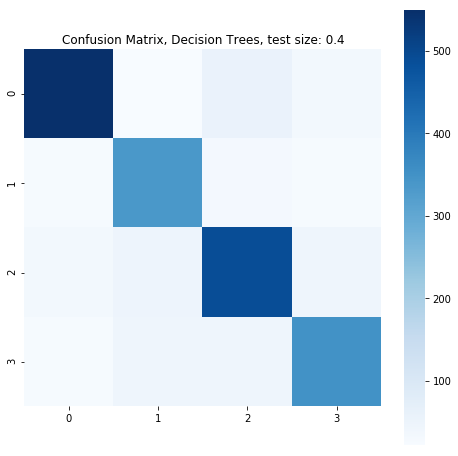

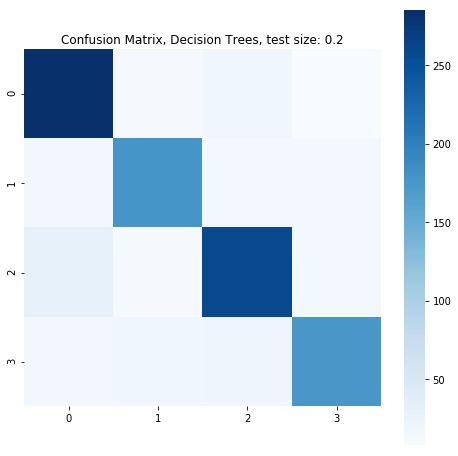

In [83]:
for test_size in [0.5, 0.4, 0.2]:
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=test_size)
    model_tree = DecisionTreeClassifier()
    model_tree.fit(X_train, y_train)
    predictions_tree = model_tree.predict(X_test)
    print('\nTest size: %f' %test_size) 
    print('Error rate: %f' %accuracy_score(y_test, predictions_tree))
    print(classification_report(y_test, predictions_tree))
    f, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_test, predictions_tree), square=True, cmap='Blues')
    ax.set(title='Confusion Matrix, Decision Trees, test size: ' + str(test_size))

## k-Nearest Neighbors

Before using the k-Nearest Neighbors algorithm we must create an encoded dataframe so that we can use it in the classification model.

In [84]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Next we test a KNN model. We begin by comparing different numbers of neighbors, metrics and p-values on a dummy 25% test size.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.25)
model_knn = KNeighborsClassifier(n_neighbors=3, p=2)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred]
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       401
           1       0.87      0.90      0.89       273
           2       0.91      0.90      0.90       410
           3       0.87      0.85      0.86       280

    accuracy                           0.89      1364
   macro avg       0.89      0.89      0.89      1364
weighted avg       0.89      0.89      0.89      1364



In [124]:
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.25)
model_knn = KNeighborsClassifier(n_neighbors=5, p=2)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred]
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       418
           1       0.86      0.86      0.86       273
           2       0.86      0.87      0.87       389
           3       0.86      0.82      0.84       284

    accuracy                           0.87      1364
   macro avg       0.87      0.86      0.86      1364
weighted avg       0.87      0.87      0.87      1364



In [125]:
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.25)
model_knn = KNeighborsClassifier(n_neighbors=3, p=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred]
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       427
           1       0.81      0.84      0.82       267
           2       0.85      0.89      0.87       376
           3       0.87      0.80      0.84       294

    accuracy                           0.86      1364
   macro avg       0.86      0.86      0.86      1364
weighted avg       0.86      0.86      0.86      1364



In [126]:
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.25)
model_knn = KNeighborsClassifier(n_neighbors=10, p=2)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred]
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       425
           1       0.81      0.85      0.83       271
           2       0.84      0.87      0.86       365
           3       0.86      0.77      0.81       303

    accuracy                           0.85      1364
   macro avg       0.84      0.84      0.84      1364
weighted avg       0.85      0.85      0.85      1364




Once again, we test the model on all 3 test sizes: 50%, 40% and 20%. For each test size we find the error rate, the precision score, the recall score, the f1 score and we plot a heatmap of the confusion matrix.


Test size: 0.500000
Error rate: 0.867669
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       811
           1       0.87      0.85      0.86       550
           2       0.87      0.87      0.87       796
           3       0.86      0.82      0.84       571

    accuracy                           0.87      2728
   macro avg       0.87      0.86      0.86      2728
weighted avg       0.87      0.87      0.87      2728


Test size: 0.400000
Error rate: 0.877691
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       652
           1       0.86      0.88      0.87       425
           2       0.88      0.87      0.87       612
           3       0.90      0.83      0.86       494

    accuracy                           0.88      2183
   macro avg       0.88      0.87      0.88      2183
weighted avg       0.88      0.88      0.88      2183


Test size: 0.200000
Error rate: 0.889194
    

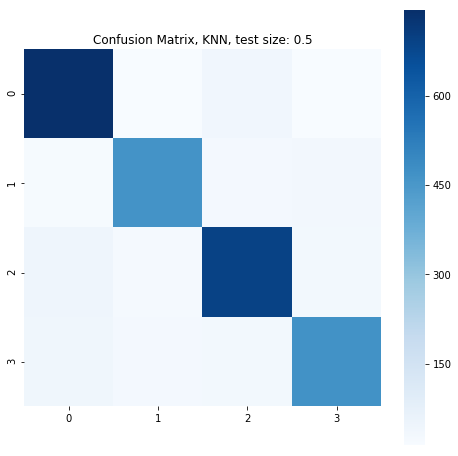

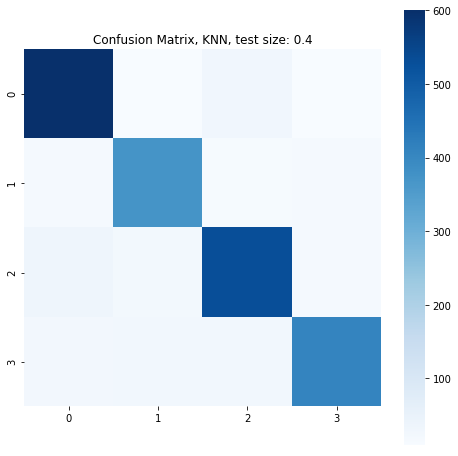

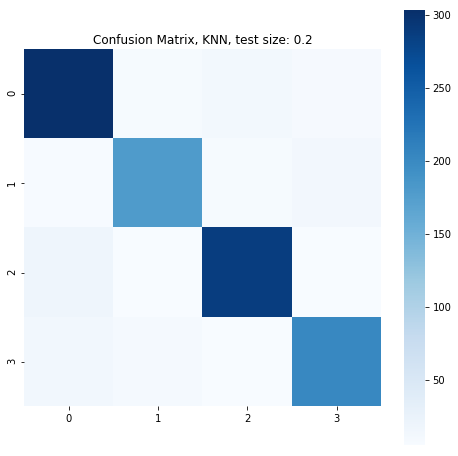

In [127]:
for test_size in [0.5, 0.4, 0.2]:
    X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=test_size)
    model_knn = KNeighborsClassifier(n_neighbors=3, p=2)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    predictions_knn = [round(value) for value in y_pred]
    print('\nTest size: %f' %test_size) 
    print('Error rate: %f' %accuracy_score(y_test, predictions_knn))
    print(classification_report(y_test, predictions_knn))
    f, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_test, predictions_knn), square=True, cmap='Blues')
    ax.set(title='Confusion Matrix, KNN, test size: ' + str(test_size))